In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv('/content/features_3_sec.csv')
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 41, saw 16


In [ ]:
x = df.drop(['filename','label'], axis = 1)
x.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [ ]:
y = df['label']
y

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.        , 0.3553988 , 0.71675699, ..., 0.02679679, 0.50674637,
        0.04778078],
       [0.        , 0.36732176, 0.67034733, ..., 0.08241395, 0.59302914,
        0.06554772],
       [0.        , 0.37315856, 0.72806736, ..., 0.0438406 , 0.5462638 ,
        0.03606165],
       ...,
       [0.        , 0.37419556, 0.69754793, ..., 0.03992147, 0.50593726,
        0.04538043],
       [0.        , 0.43653695, 0.65774457, ..., 0.01910101, 0.51990048,
        0.01373955],
       [0.        , 0.40815099, 0.67614332, ..., 0.03194326, 0.46137225,
        0.03454808]])

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
label_mapping

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.3, random_state = 1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
y_pred

array([2, 9, 2, ..., 1, 7, 3])

In [ ]:
y_test

array([1, 9, 2, ..., 1, 7, 3])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[287   0   4   1   3   2   0   0   1   4]
 [  2 275   5   1   0  11   0   1   0   1]
 [  6   4 269   6   1  10   0   2   6   8]
 [  1   2   2 262   2   1   1   3   1   8]
 [  1   0   1   4 289   2   2   7  14   0]
 [  1   9   5   0   0 269   0   0   3   2]
 [  0   0   0   0   1   0 299   0   0   3]
 [  0   0   1   6   1   3   0 279   3   5]
 [  2   1   7   2   0   1   0   1 294   2]
 [  5   5   5   5   1   4   6   1   0 252]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       302
           1       0.93      0.93      0.93       296
           2       0.90      0.86      0.88       312
           3       0.91      0.93      0.92       283
           4       0.97      0.90      0.94       320
           5       0.89      0.93      0.91       289
           6       0.97      0.99      0.98       303
           7       0.95      0.94      0.94       298
           8       0.91      0.95      0.93       310
           9       0.88     

In [ ]:
error_rate = []

for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors = i)
  KNN.fit(x_train,y_train)
  pred_i = KNN.predict(x_test)

  error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

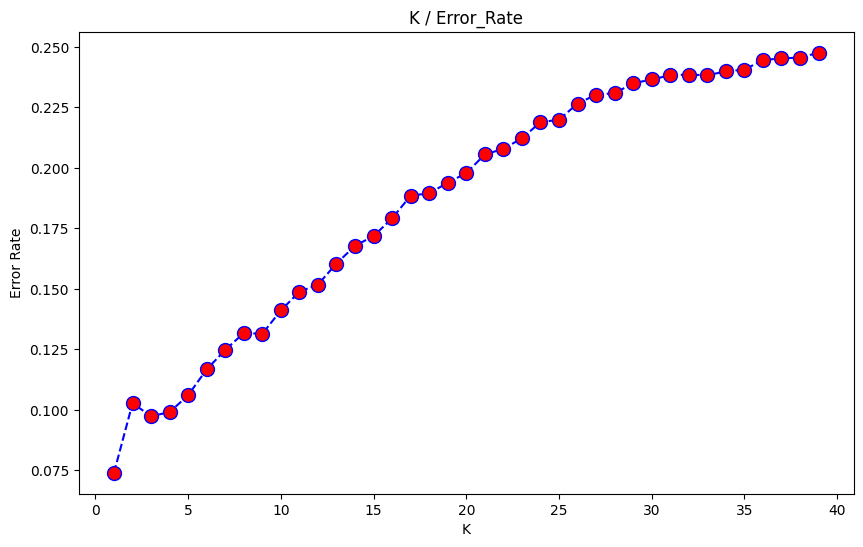

In [ ]:
plt.figure(figsize = (10,6))

plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', markersize = '10', markerfacecolor = 'red', marker = 'o')

plt.title('K / Error_Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')